# STEP 1: Install Requirements

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt roboflow

import torch
import os
from IPython.display import Image, clear_output

print(f"Setup complete, Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 15529, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (93/93), done.
remote: Total 15529 (delta 49), reused 118 (delta 43), pack-reused 15393
Receiving objects: 100% (15529/15529), 14.59 MiB | 31.25 MiB/s, done.
Resolving deltas: 100% (10573/10573), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.5 MB/s eta 0:00:00
Setup complete, Using torch 2.0.0+cu118 (Tesla T4)


# STEP 2: Dataset

In [7]:
from roboflow import Roboflow
rf = Roboflow(api_key="YOUR_API_KEY")
project = rf.workspace("my-wokrspace").project("smart-shopping-cart-fjhoz")
dataset = project.version(1).download("yolov5")

loading Roboflow workspace...
loading Roboflow project...


Extracting Dataset Version Zip to Smart-Shopping-Cart-1 in yolov5pytorch:: 100%|██████████| 1228/1228 [00:00<00:00, 1864.72it/s]


# STEP 3: Train Custom YOLOv5 Model

In [5]:
%cd yolov5/

[Errno 2] No such file or directory: 'yolov5/'
/content/yolov5


In [8]:
!python train.py --img 640 --batch 16 --epochs 150 --data {dataset.location}/data.yaml --weights yolov5s.pt --cache

train: weights=yolov5s.pt, cfg=, data=/content/yolov5/Smart-Shopping-Cart-1/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=150, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=

# STEP 4: Evaluate

In [11]:

!python detect.py --weights runs/train/exp3/weights/best.pt --img 640 --conf 0.1 --source {dataset.location}/test/images

detect: weights=['runs/train/exp3/weights/best.pt'], source=/content/yolov5/Smart-Shopping-Cart-1/test/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: /content/requirements.txt not found, check failed.
YOLOv5 🚀 v7.0-145-g94714fe Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7023610 parameters, 0 gradients, 15.8 GFLOPs
image 1/61 /content/yolov5/Smart-Shopping-Cart-1/test/images/04144170-icimsut-314_jpg.rf.9dc8cb7e6fb585e64907c21f146495c7.jpg: 640x640 1 icimsut, 11.5ms
image 2/61 /content/yolov5/Smart-Shopping-Cart-1/test/images/0987e627-icimsut-366_jpg.rf.0e3516f9c5

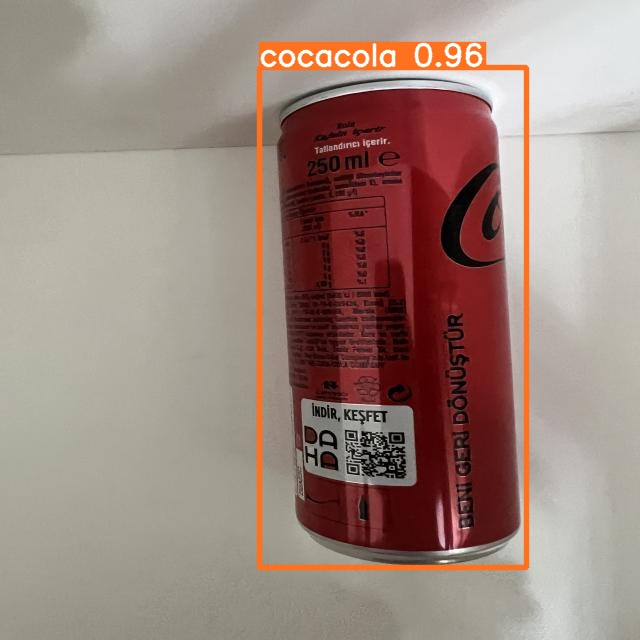

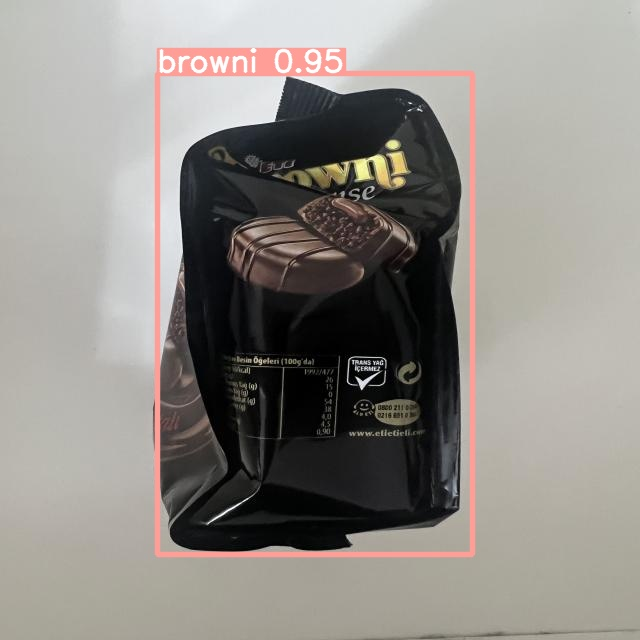

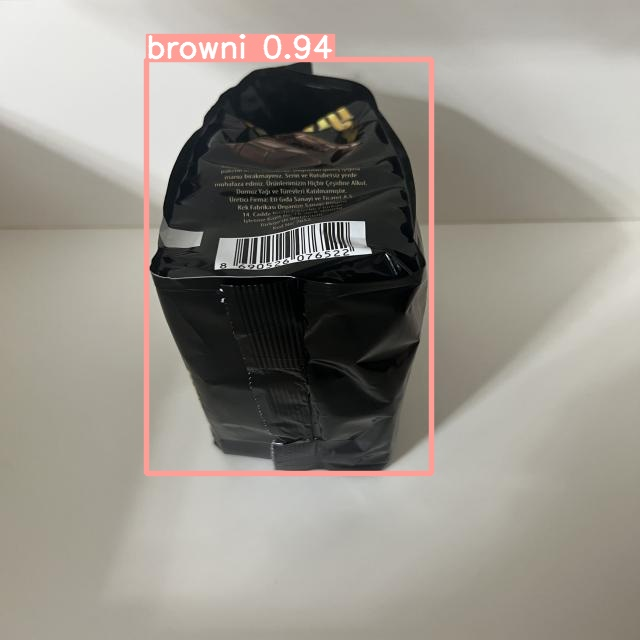

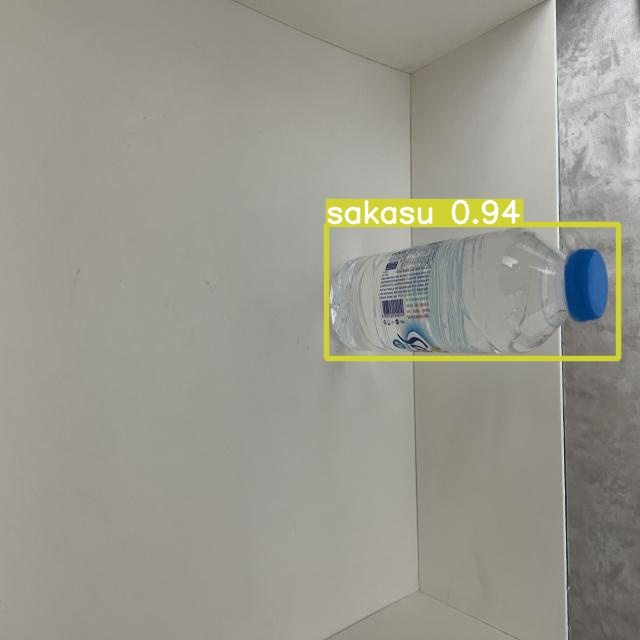

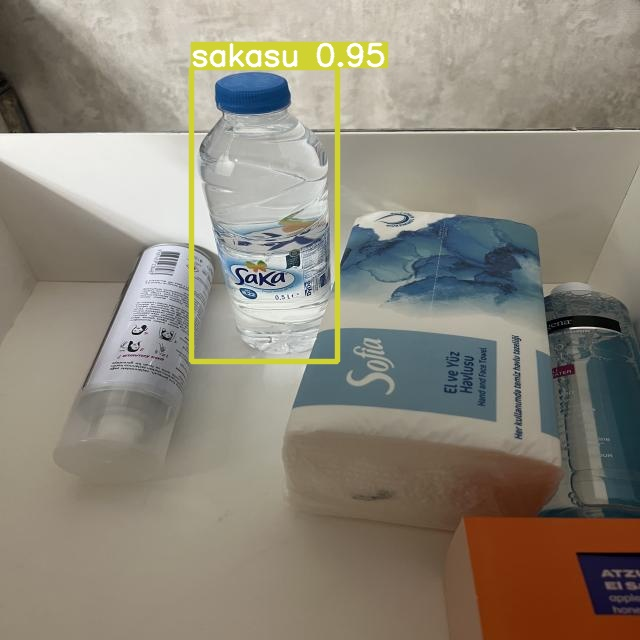

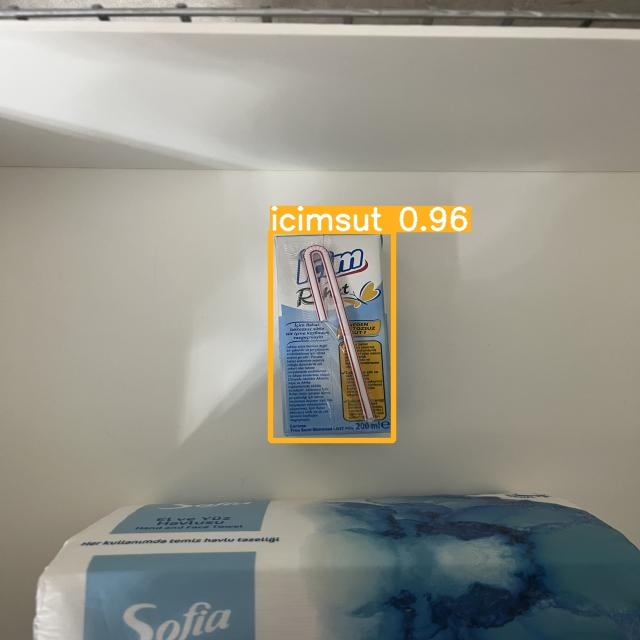

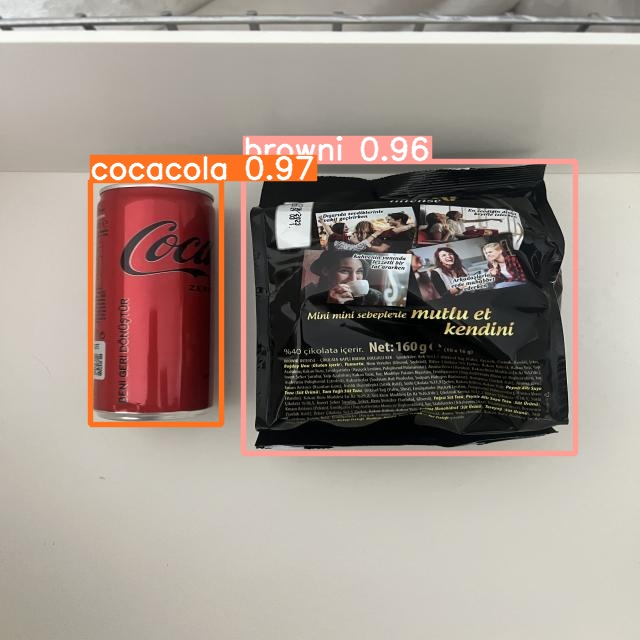

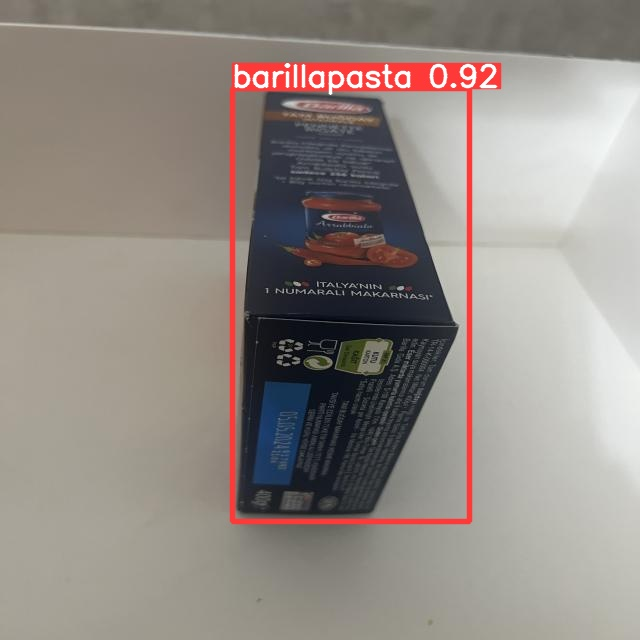

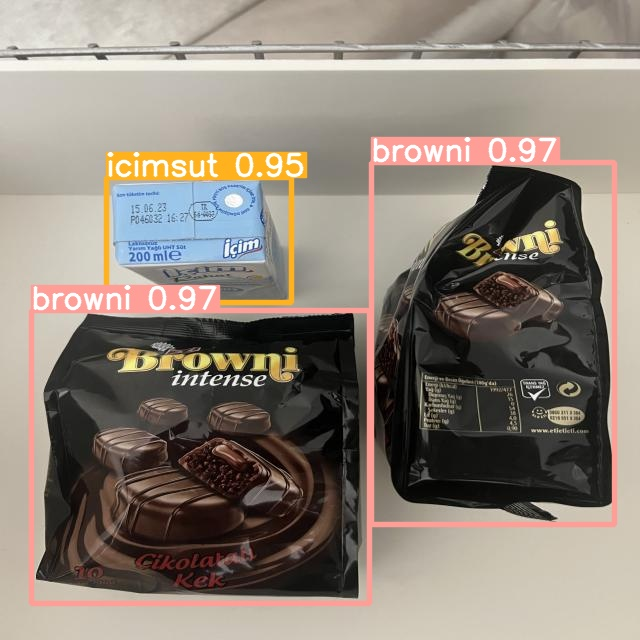

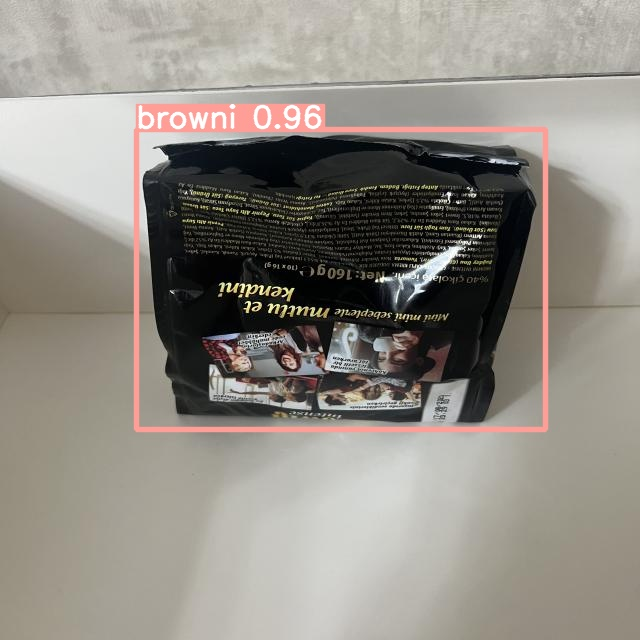

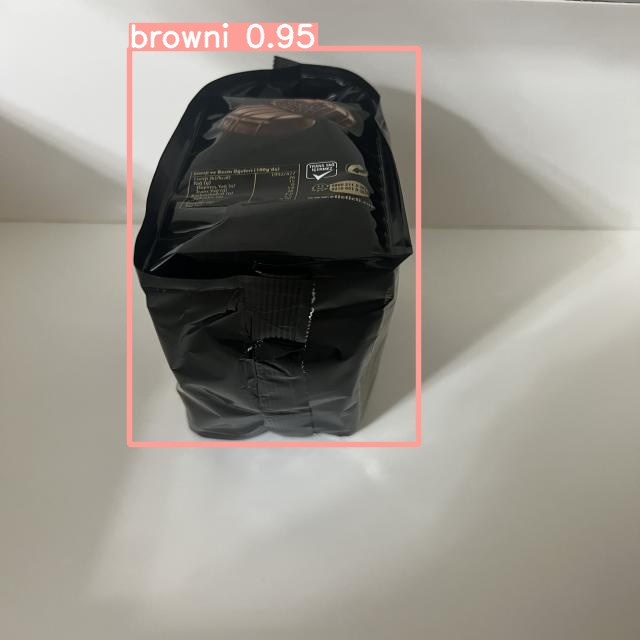

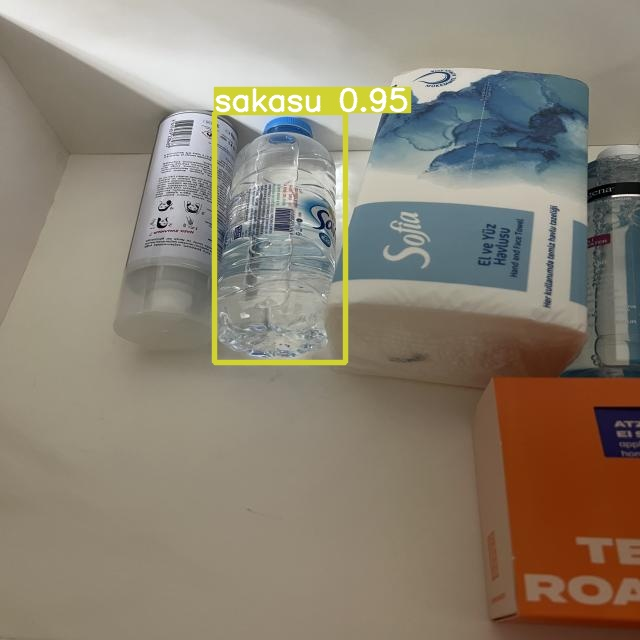

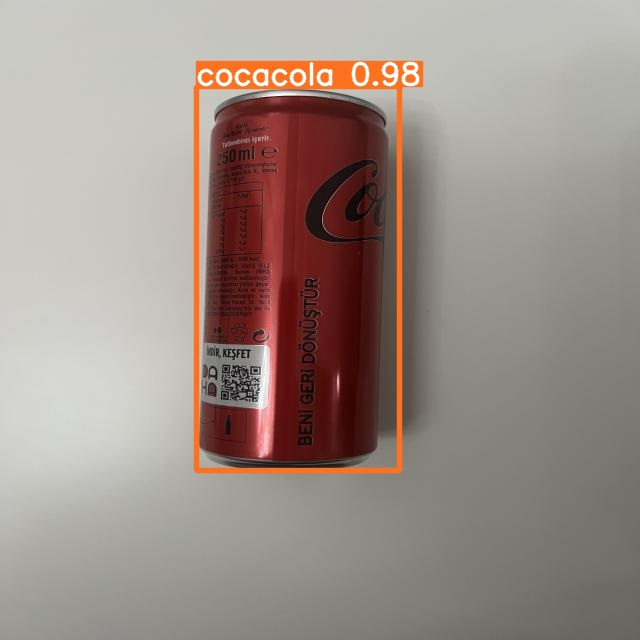

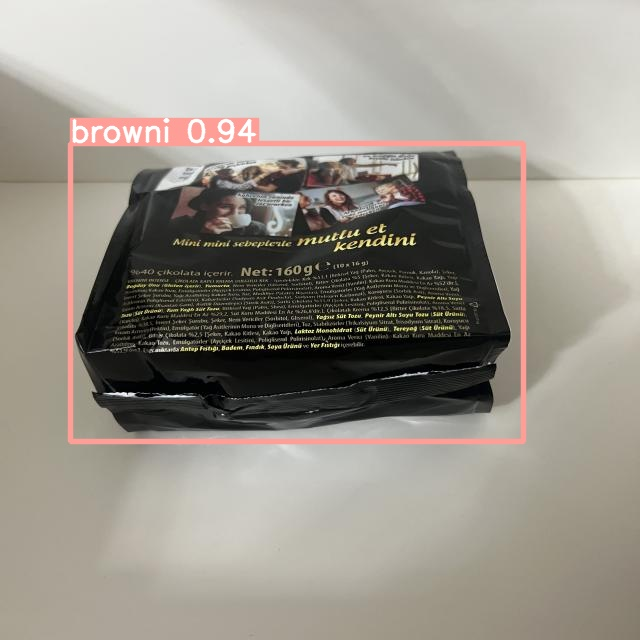

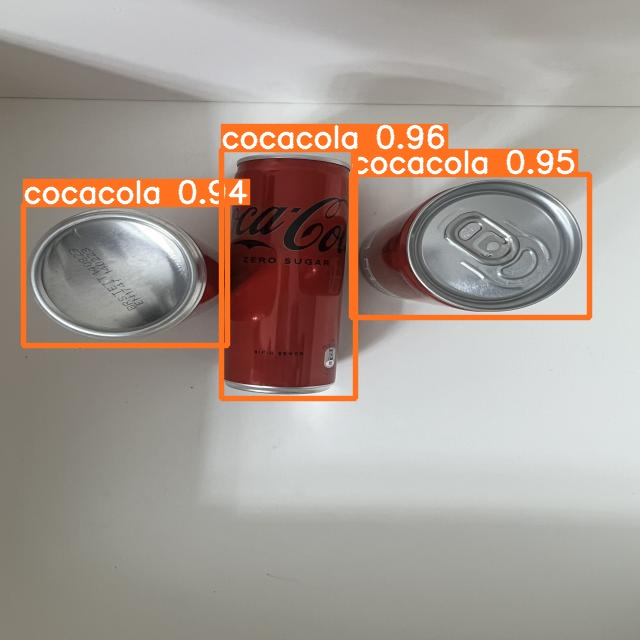

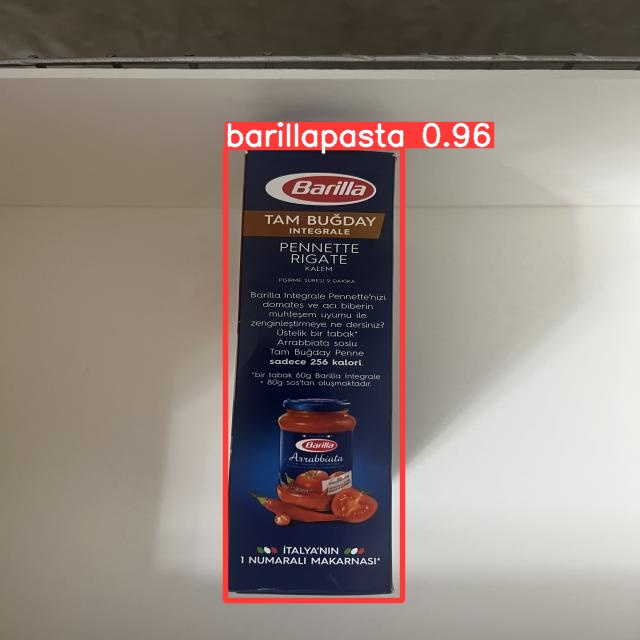

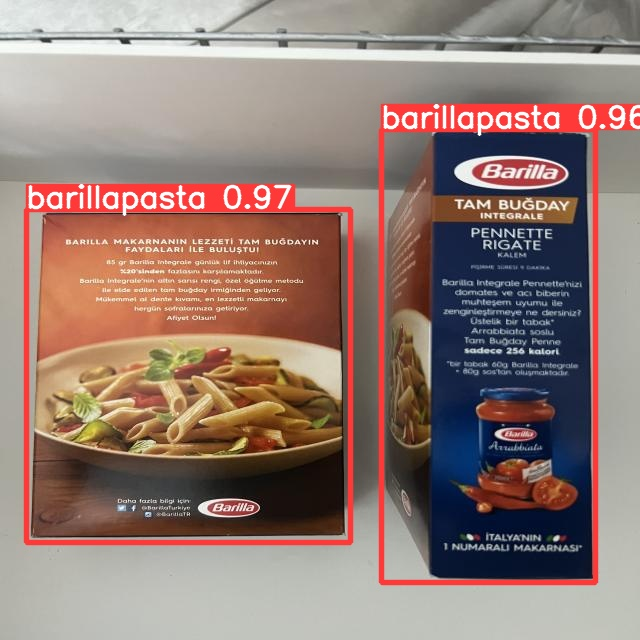

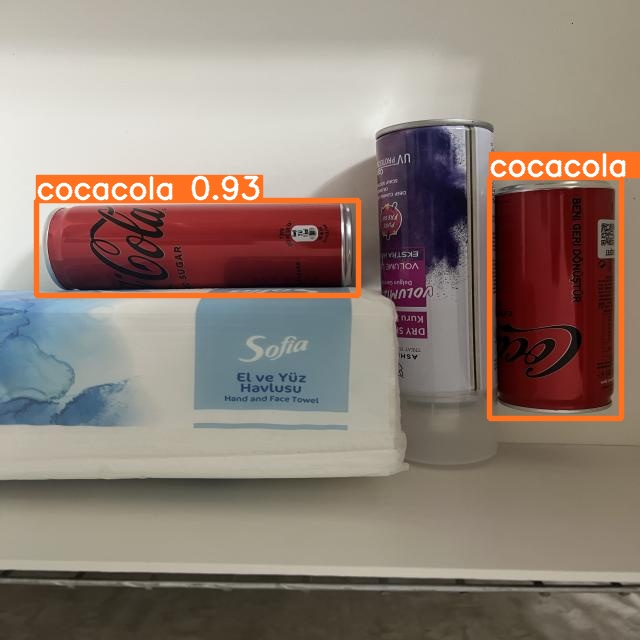

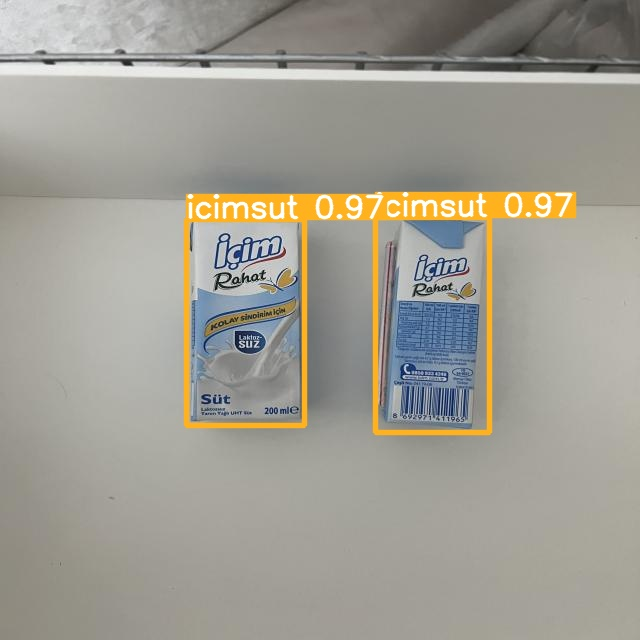

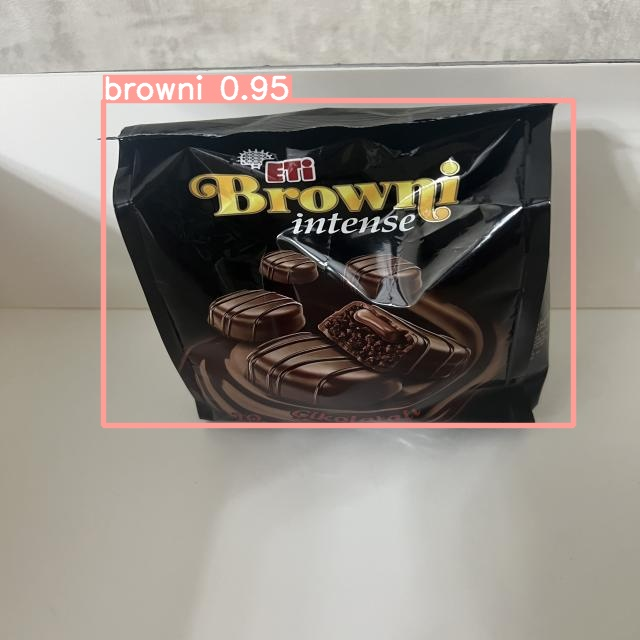

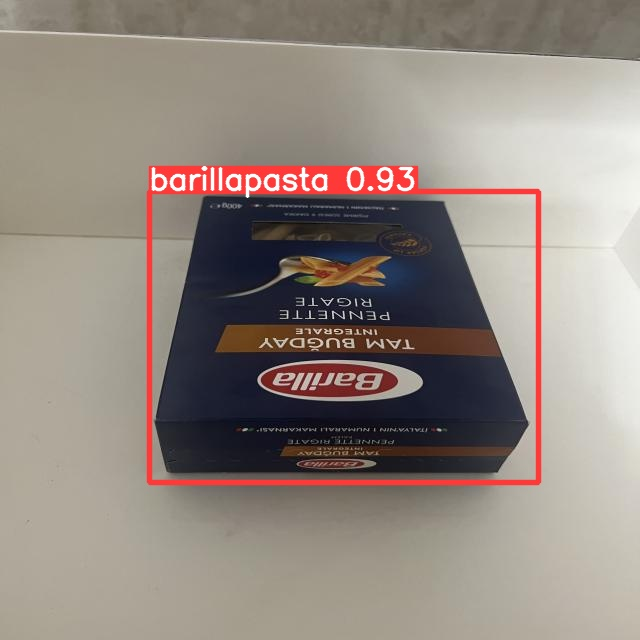

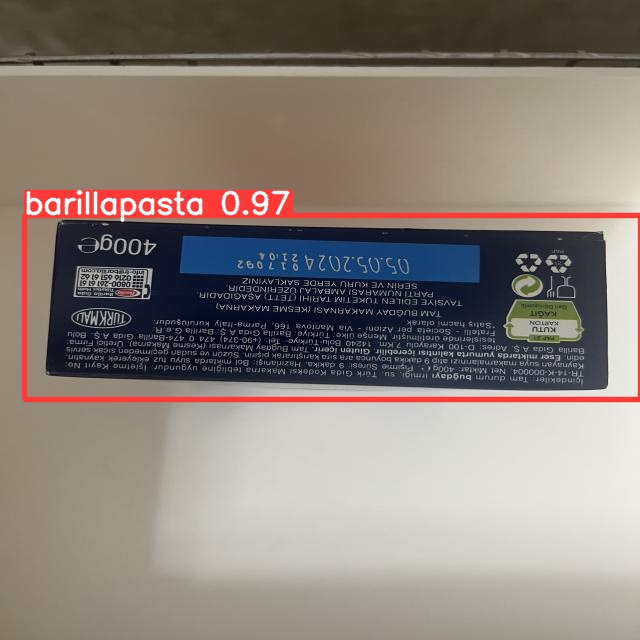

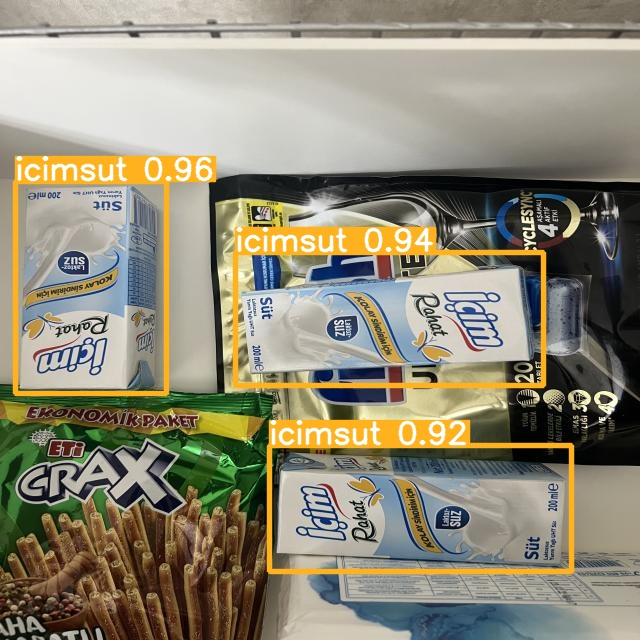

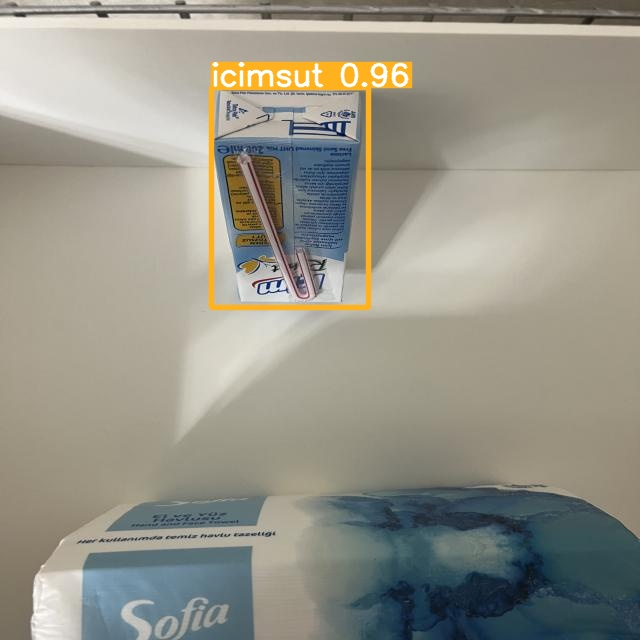

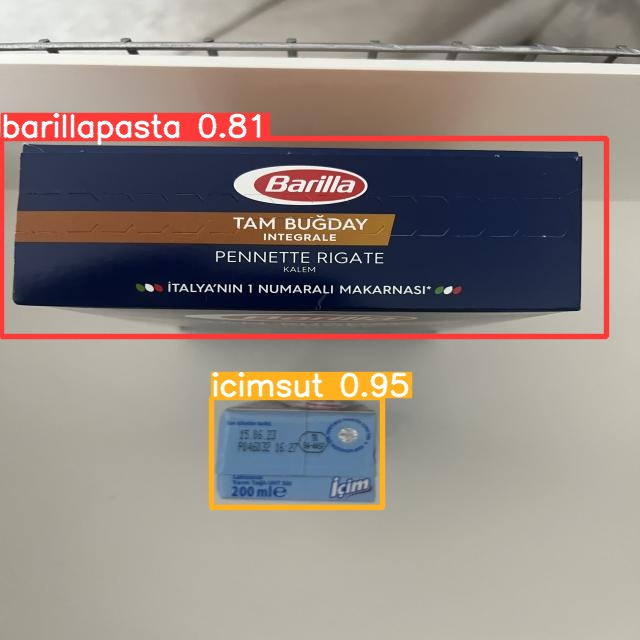

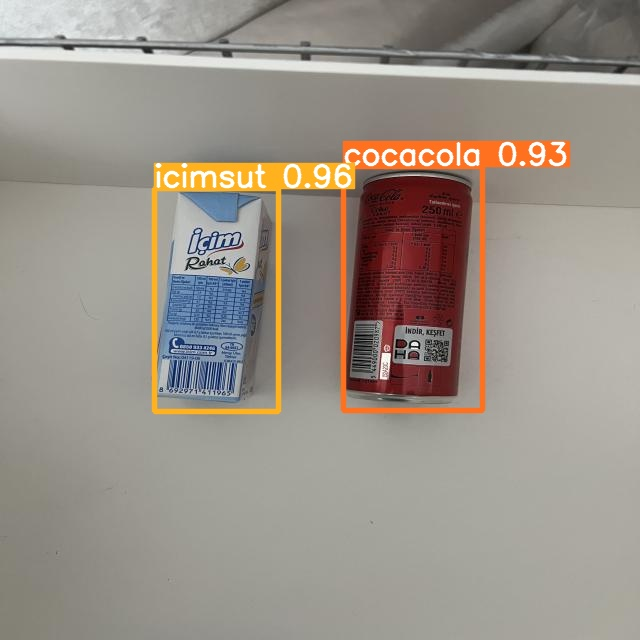

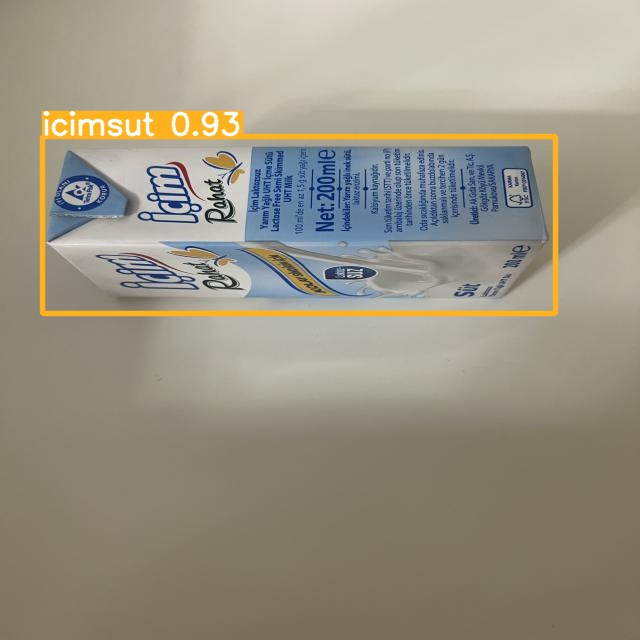

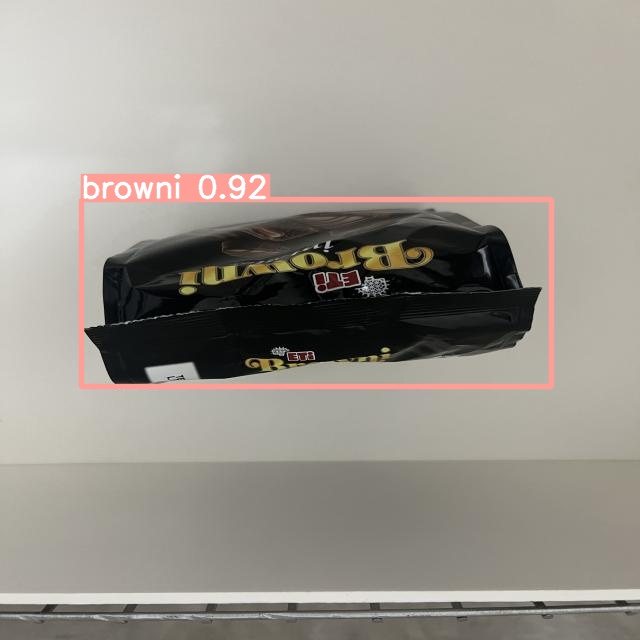

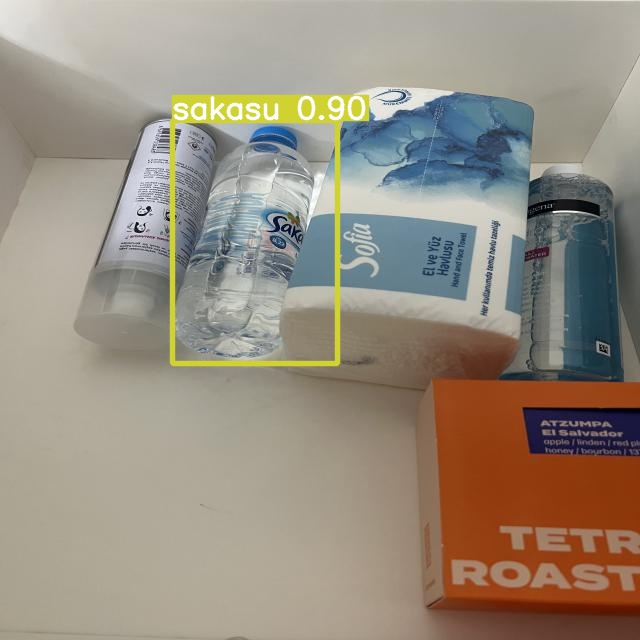

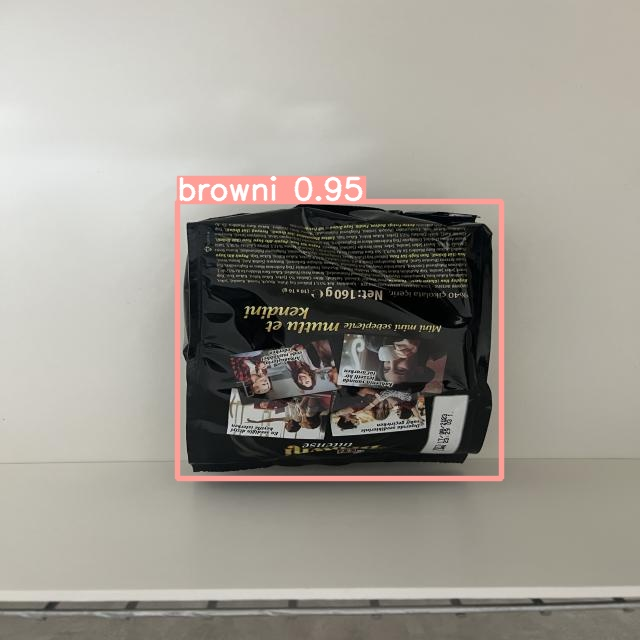

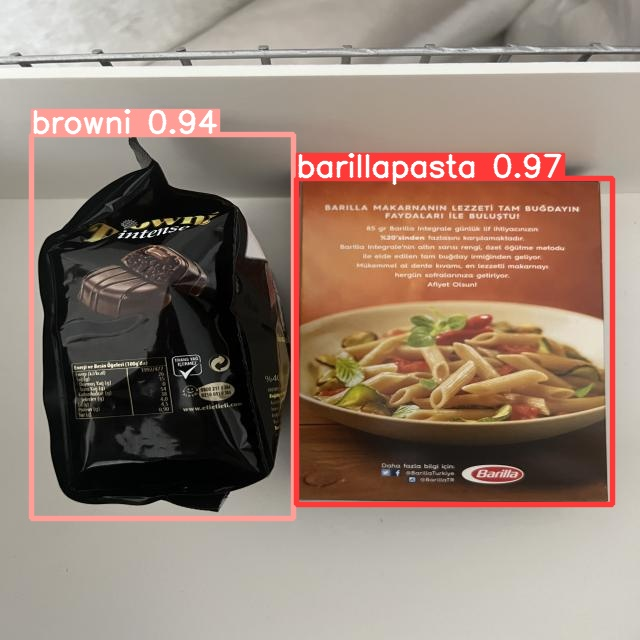

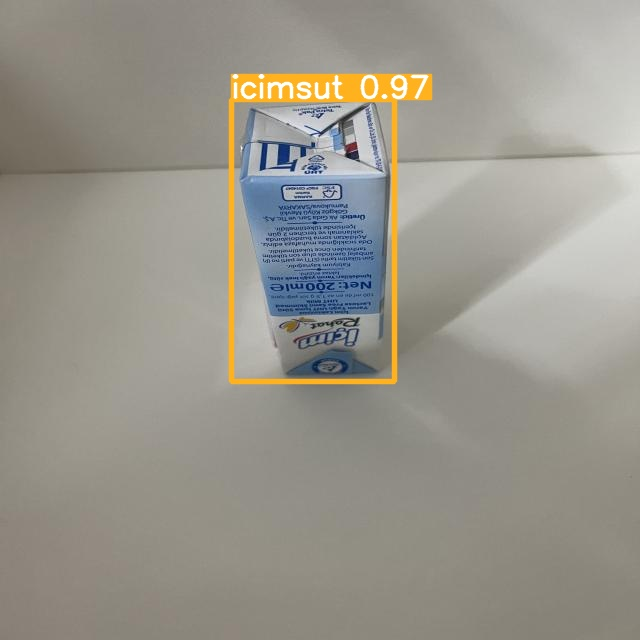

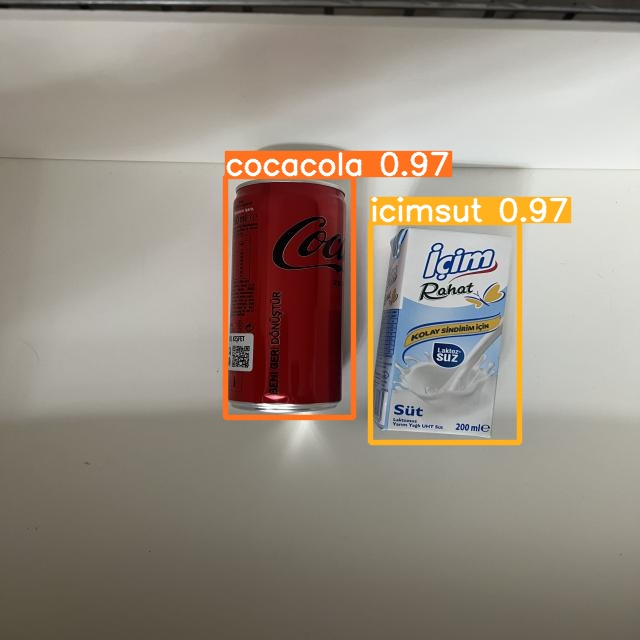

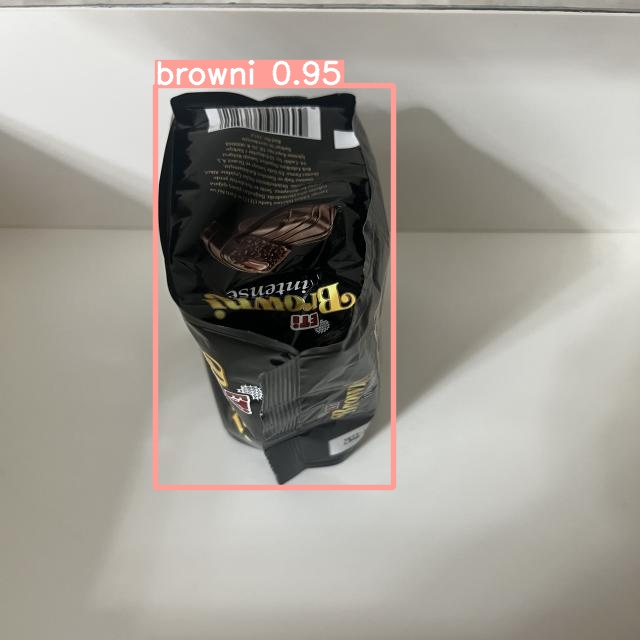

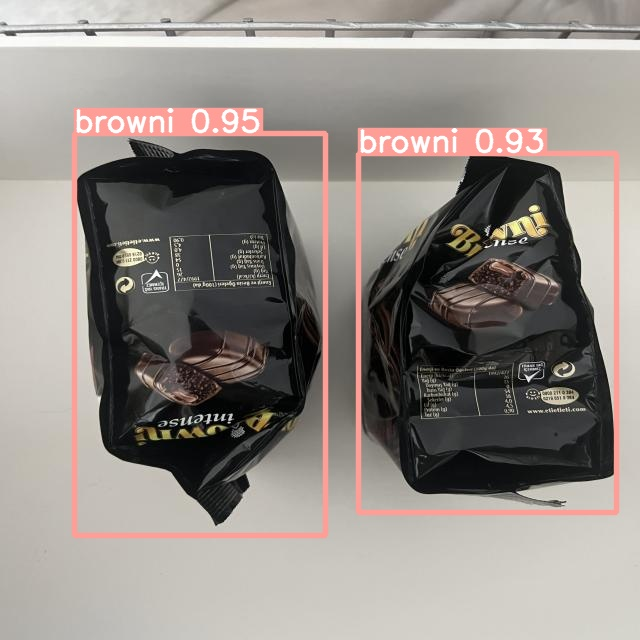

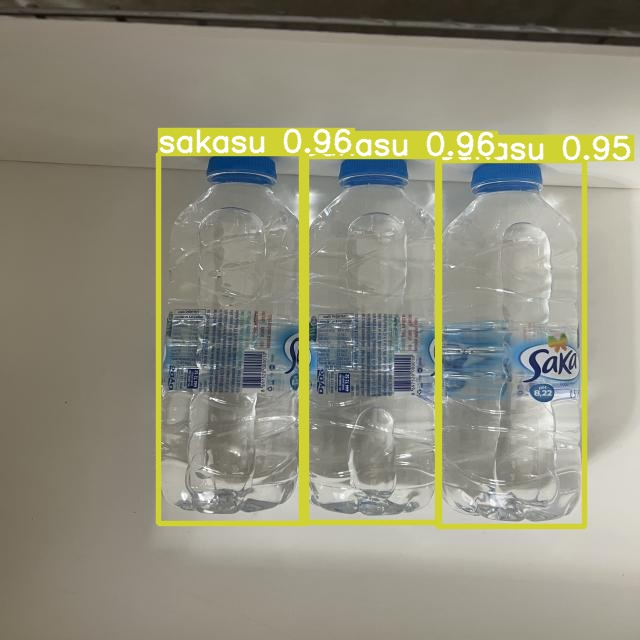

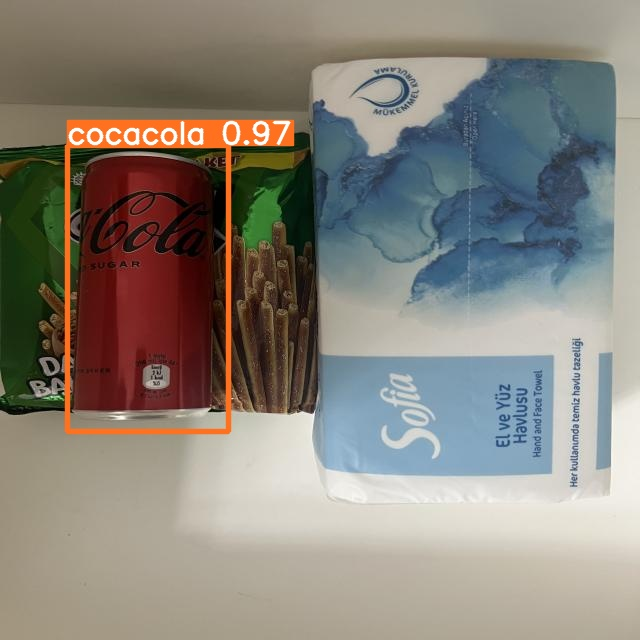

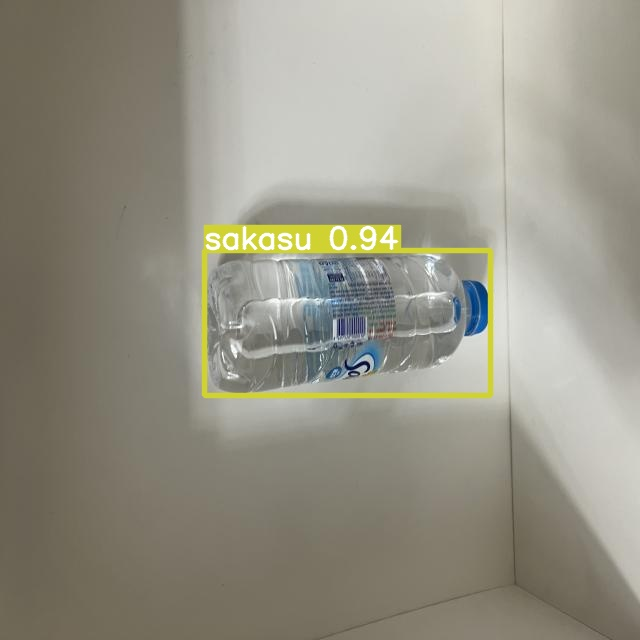

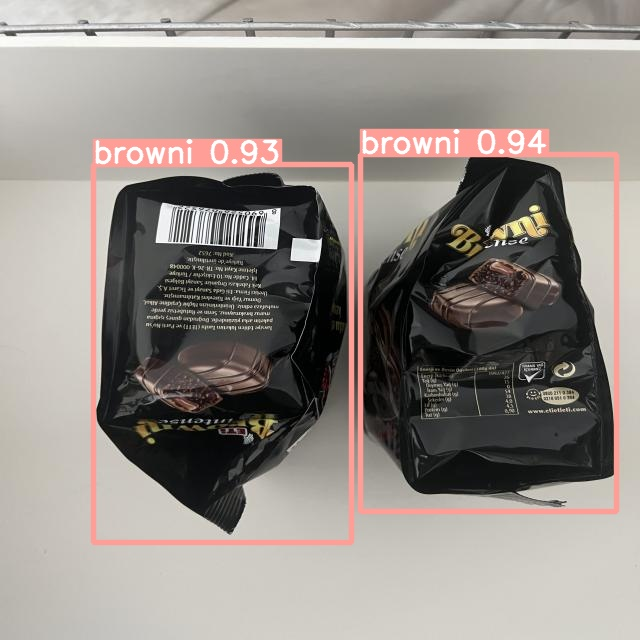

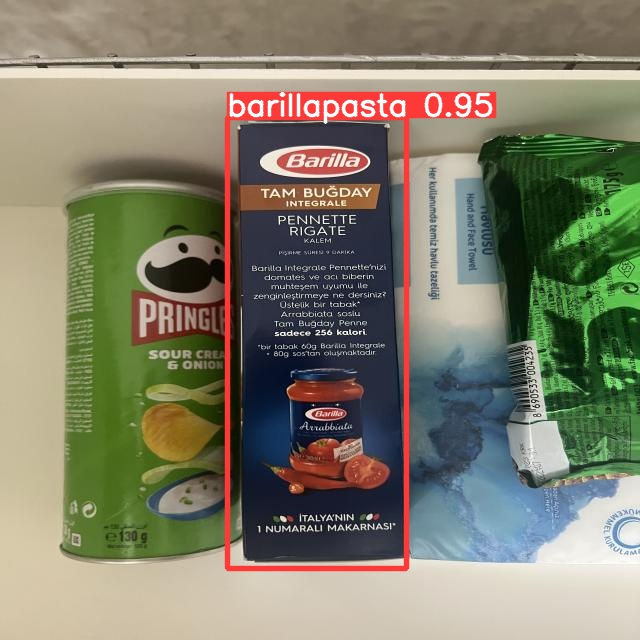

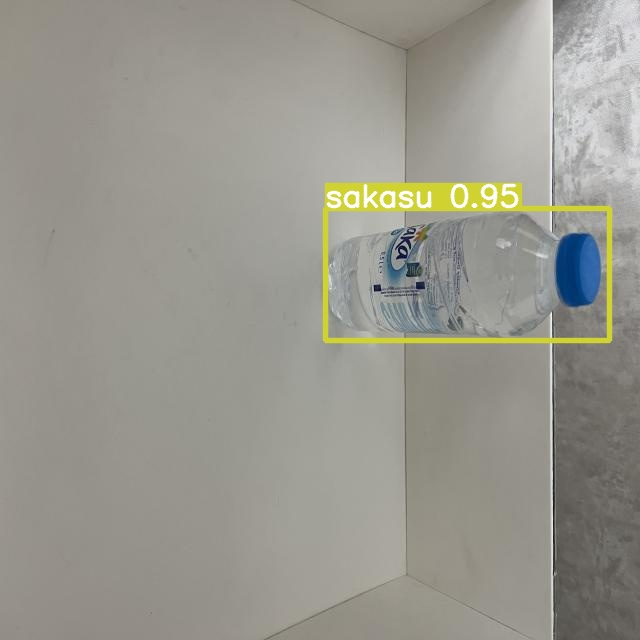

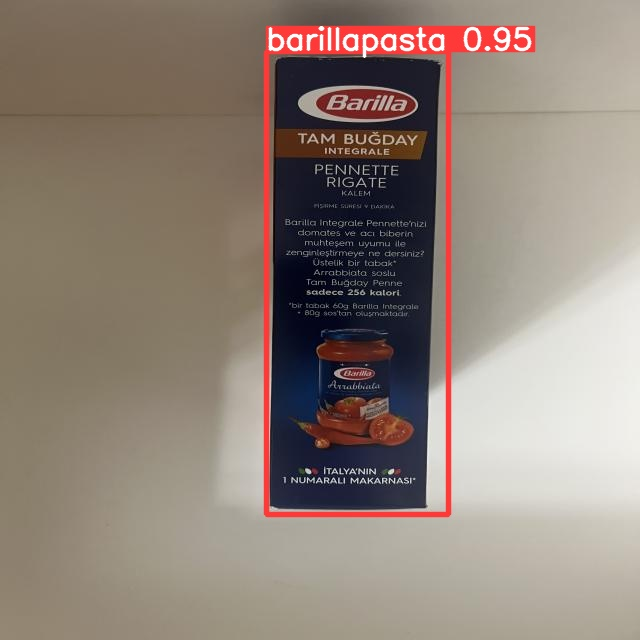

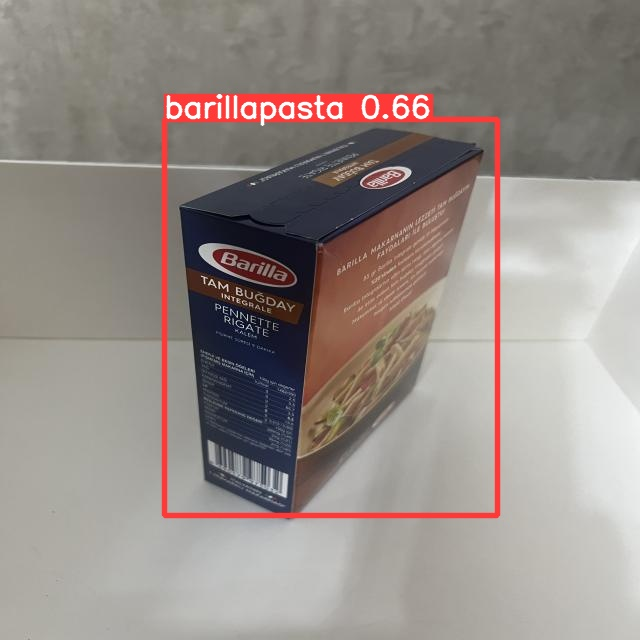

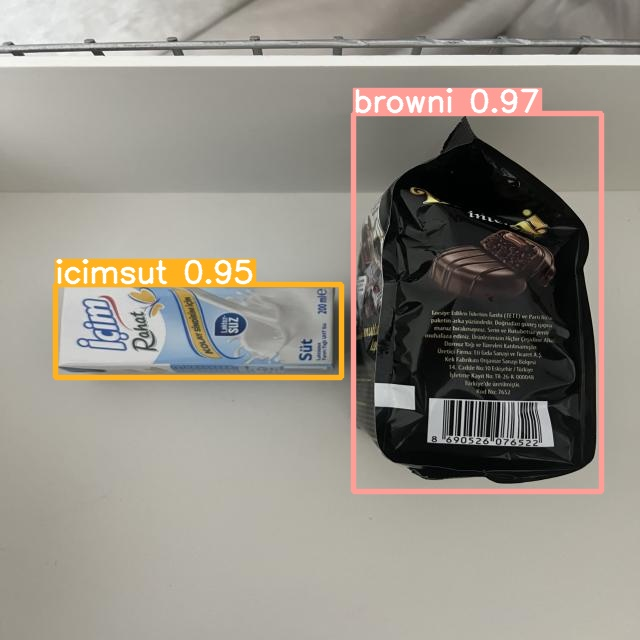

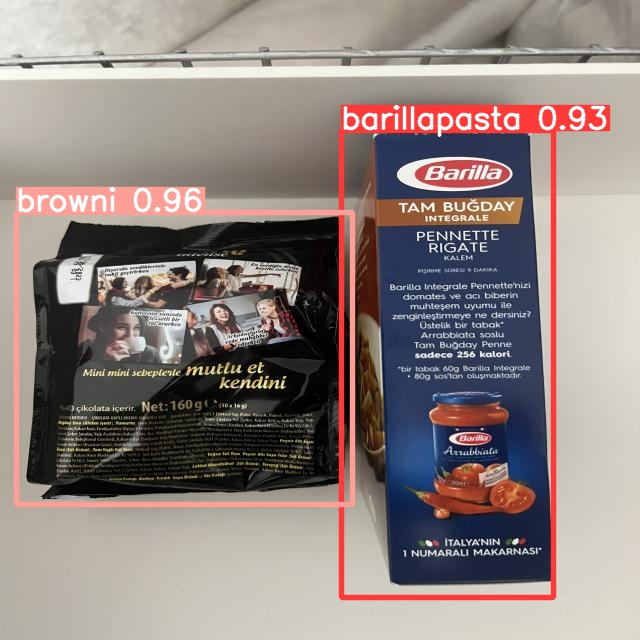

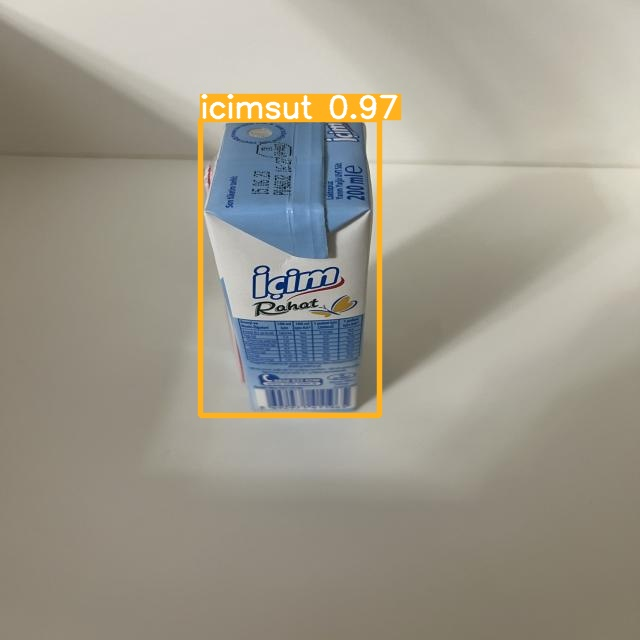

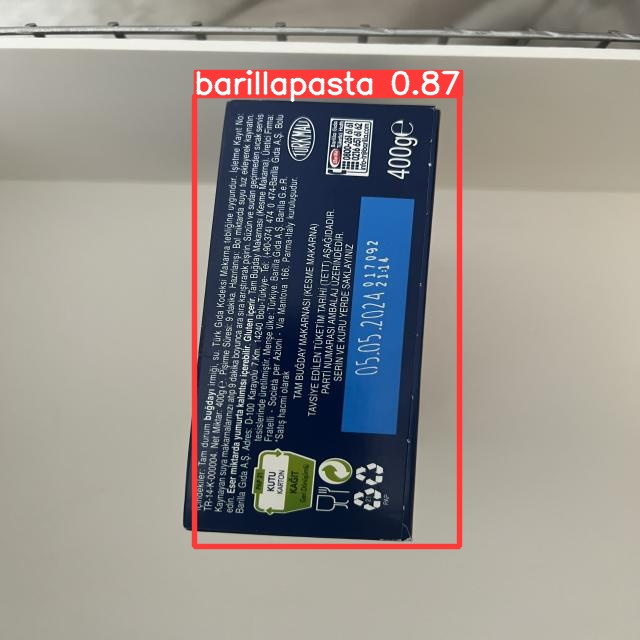

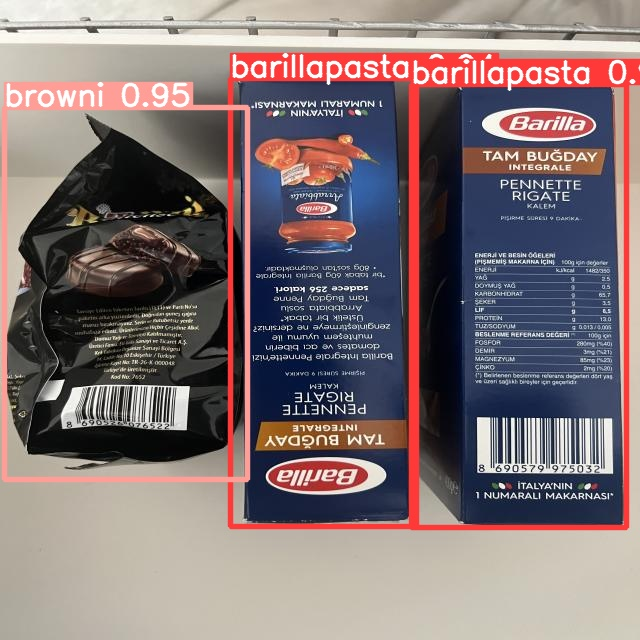

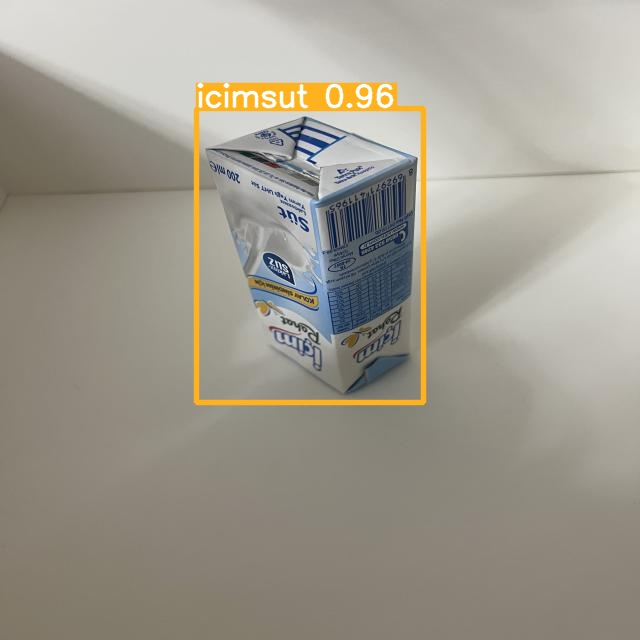

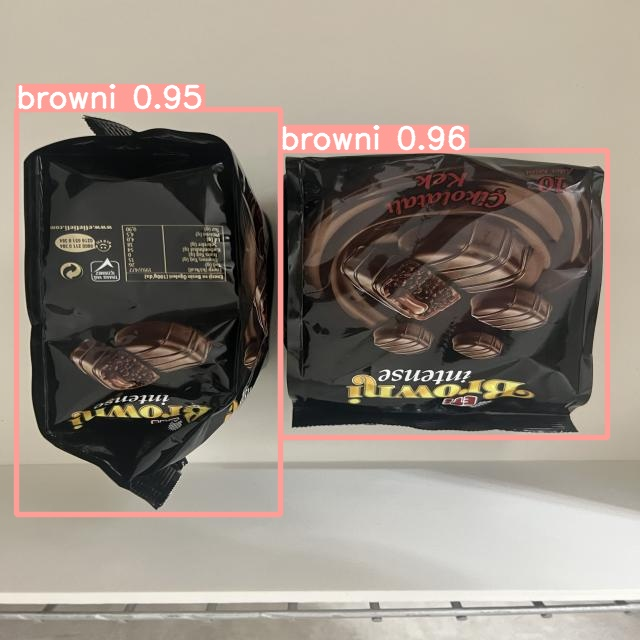

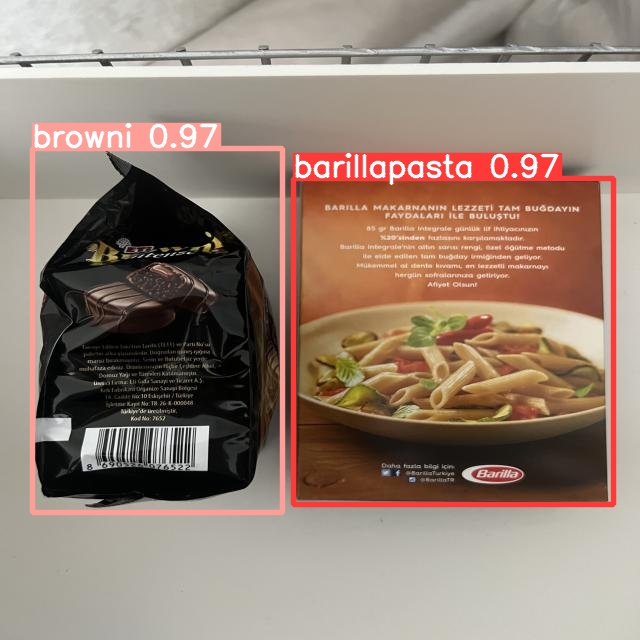

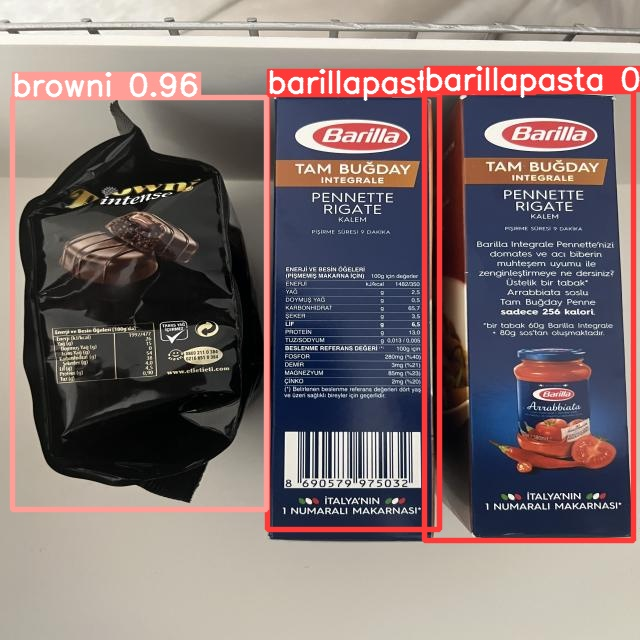

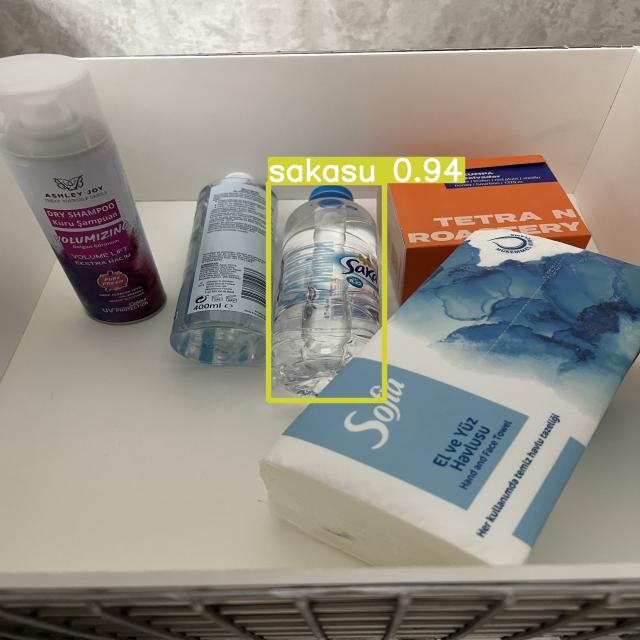

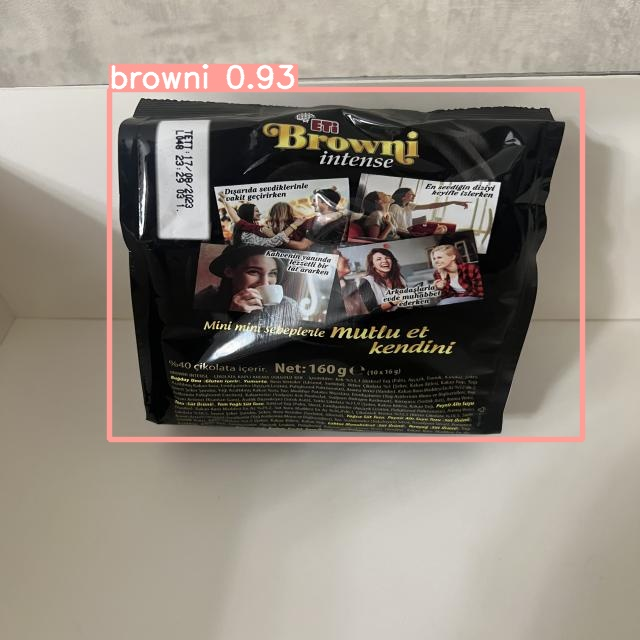

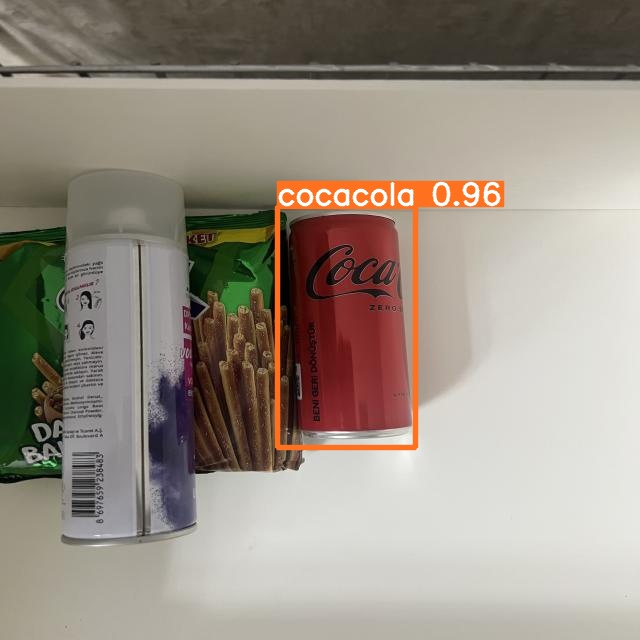

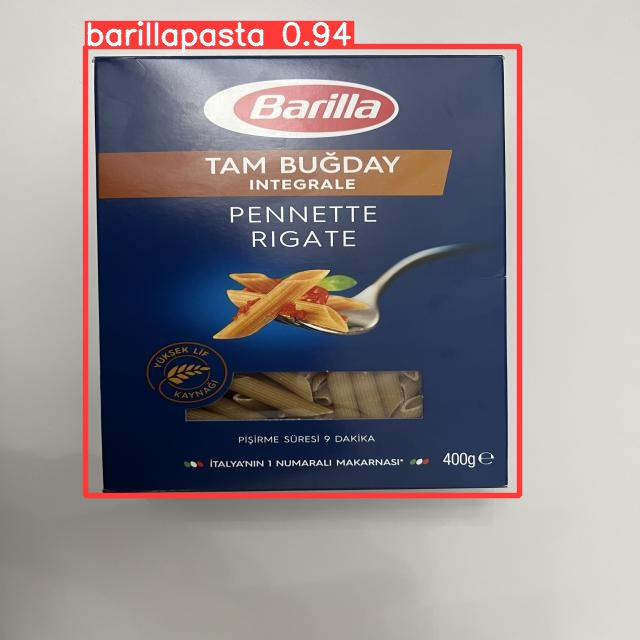

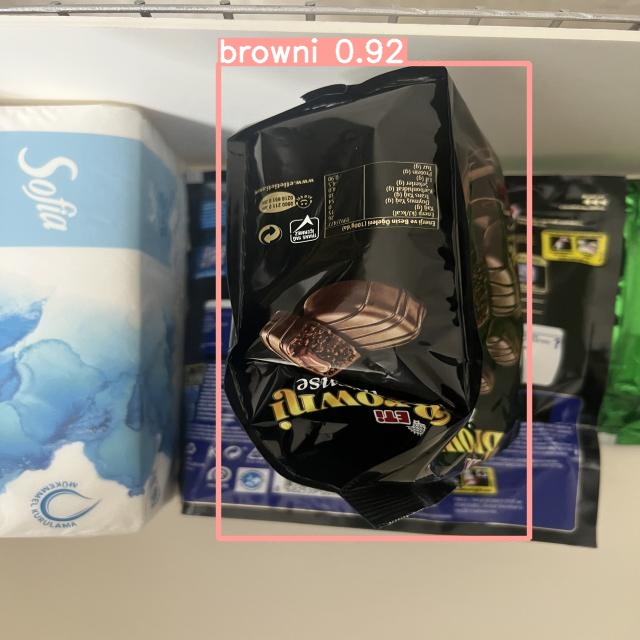

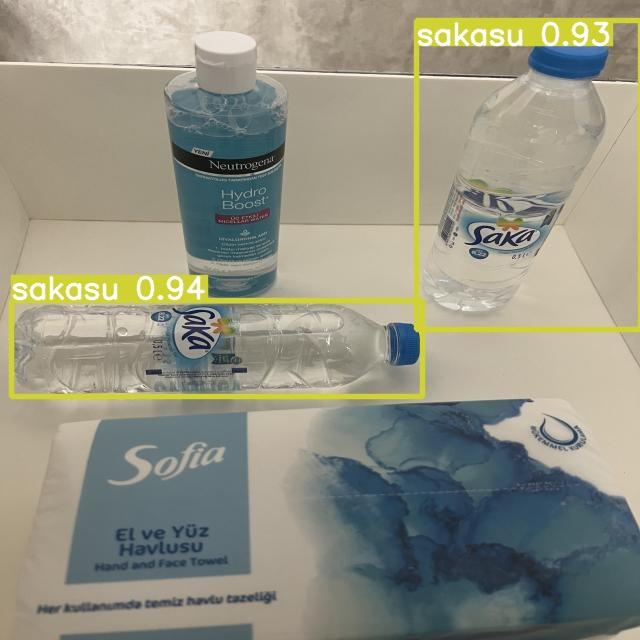

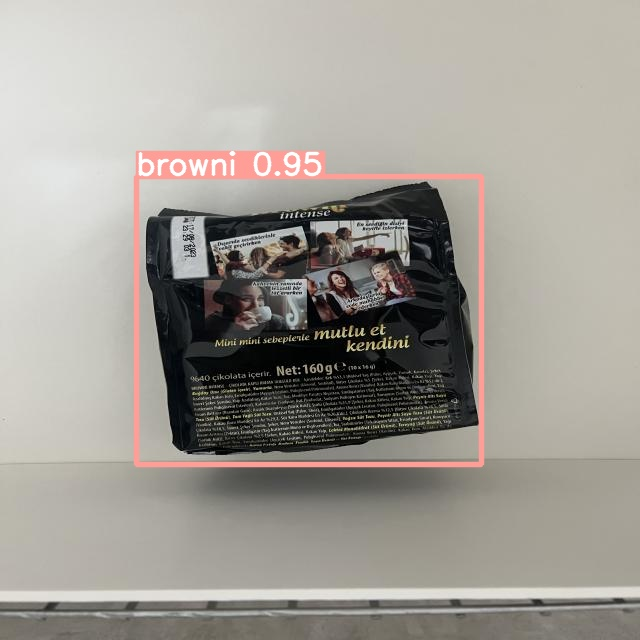

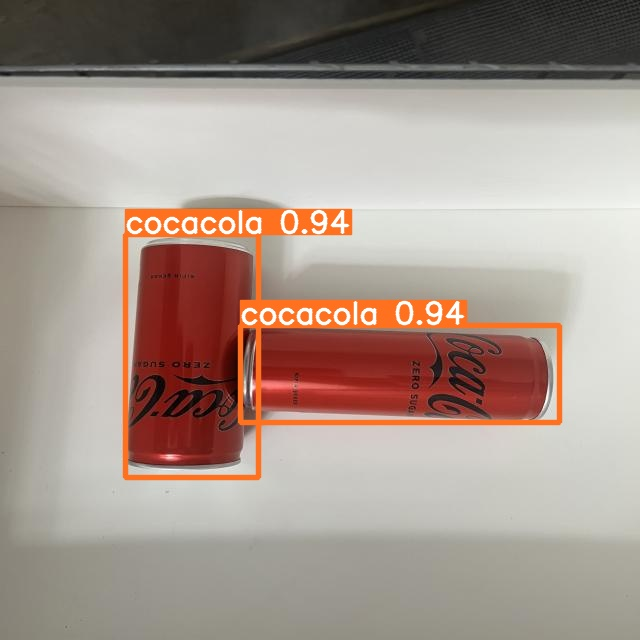

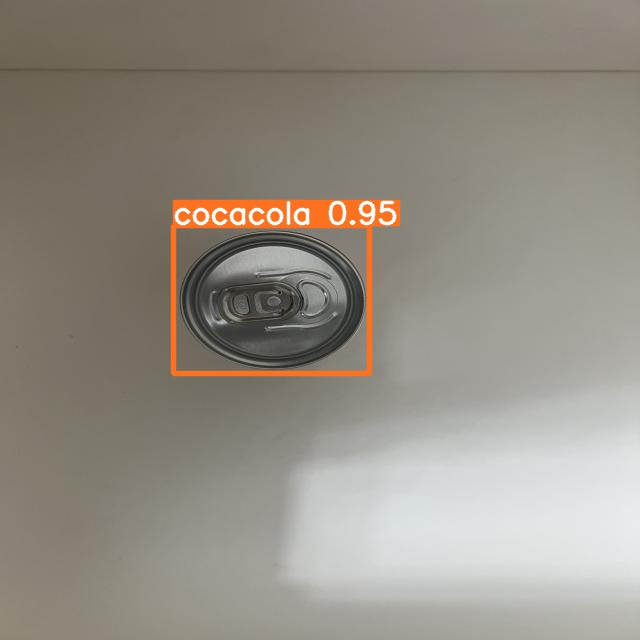

In [15]:
import glob
from IPython.display import Image, display

for imageName in glob.glob("/content/yolov5/runs/detect/exp2/*.jpg"):
  display(Image(filename=imageName))
  print("\n")

In [20]:
!zip -r /content/exp2 /content/yolov5/runs/detect/exp2


  adding: content/yolov5/runs/detect/exp2/ (stored 0%)
  adding: content/yolov5/runs/detect/exp2/09eb63af-cocacola-105_jpg.rf.a64d3b79c9f726e812f7d6b15d0a77a7.jpg (deflated 6%)
  adding: content/yolov5/runs/detect/exp2/d8af0e15-browni-413_jpg.rf.923d6cd7a16f4f6f5ea8e9bd39c6f73d.jpg (deflated 8%)
  adding: content/yolov5/runs/detect/exp2/527b5791-browni-471_jpg.rf.8ace0599575e8a70728ce2f8f0c3c373.jpg (deflated 9%)
  adding: content/yolov5/runs/detect/exp2/3cedf10e-sakasu-016_jpg.rf.bb25eab35741d8ea8f5a2d8265222bf7.jpg (deflated 9%)
  adding: content/yolov5/runs/detect/exp2/9fdc526b-sakasu-054_jpg.rf.80babda3c6b527aa88640aa26bcb7d2f.jpg (deflated 5%)
  adding: content/yolov5/runs/detect/exp2/60c77058-icimsut-388_jpg.rf.b2a988414a807cae27006d32516fbcee.jpg (deflated 8%)
  adding: content/yolov5/runs/detect/exp2/1583f22e-mixed-531_jpg.rf.7c7005dcce4f3d24452d2793eb69d37d.jpg (deflated 7%)
  adding: content/yolov5/runs/detect/exp2/0fcd65a0-barillapasta-275_jpg.rf.3fb318fb23b17ddf75b95e3daf34

In [ ]:
from google.colab import files

files.download("/content/exp2.zip")
# files.download('file.txt')